In [2]:
#importing libraries 
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [3]:
#image properties
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [4]:
#datasetfor training
filenames=os.listdir("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/train/")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [5]:
#datasetfor test
filenames=os.listdir("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

test_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [6]:
test_df['category'].nunique()

1

In [7]:
#neural network
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,/
     Dropout,Flatten,Dense,Activation,/
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

c:\Users\Madhumitha\anaconda3\envs\llmenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#analysing neural network
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [9]:
#callbacks and learning rate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [10]:
#dataframe management 
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [11]:
test_df

filename  category
0          1.jpg         0
1         10.jpg         0
2        100.jpg         0
3       1000.jpg         0
4      10000.jpg         0
...          ...       ...
12495   9995.jpg         0
12496   9996.jpg         0
12497   9997.jpg         0
12498   9998.jpg         0
12499   9999.jpg         0

[12500 rows x 2 columns]

In [16]:
train_path = r'D:\madhu\AI_intern\Basic\dog_cat\dog_cat_classification\dogs-vs-cats\train'
# valid_path = r'C:\Users\KIIT\Dropbox\My PC (BT1906126)\Desktop\python\Project\flowers\Flowers final\val'
test_path = r'D:\madhu\AI_intern\Basic\dog_cat\dog_cat_classification\dogs-vs-cats\test1'

In [23]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator =  test_datagen.flow_from_directory(test_path, target_size = (*Image_Size, *Image_Size), class_mode = 'binary',
                                             batch_size = 32)

In [25]:
#training
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


c:\Users\Madhumitha\anaconda3\envs\llmenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 861s 642ms/step - accuracy: 0.5925 - loss: 0.9482 - val_accuracy: 0.6619 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 2/10


c:\Users\Madhumitha\anaconda3\envs\llmenv\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 108us/step - accuracy: 0.7333 - loss: 0.4333 - val_accuracy: 0.4000 - val_loss: 0.7387 - learning_rate: 0.0010
Epoch 3/10


c:\Users\Madhumitha\anaconda3\envs\llmenv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 768s 575ms/step - accuracy: 0.6916 - loss: 0.5894 - val_accuracy: 0.7840 - val_loss: 0.4536 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 47us/step - accuracy: 0.6667 - loss: 0.5317 - val_accuracy: 0.8000 - val_loss: 0.3463 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 837s 627ms/step - accuracy: 0.7446 - loss: 0.5229 - val_accuracy: 0.7361 - val_loss: 0.5793 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 98us/step - accuracy: 0.7333 - loss: 0.5007 - val_accuracy: 0.8000 - val_loss: 0.6361 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 768s 576ms/step - accuracy: 0.7685 - loss: 0.4858 - val_accuracy: 0.7493 - val_loss: 0.5375 - learning_rate: 0.0010
Epoch 8/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 59us/step - accuracy: 0.7333 - loss: 0.4845 - val_accuracy: 0.4000 - val_loss: 1.0149 - learning_rate: 0.0010
Epoch 9/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 870s 652ms/step - accuracy: 0.

In [26]:
#saving model
model.save("model1_catdog_10epoch.h5")

In [27]:
#test data
test_filenames = os.listdir("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

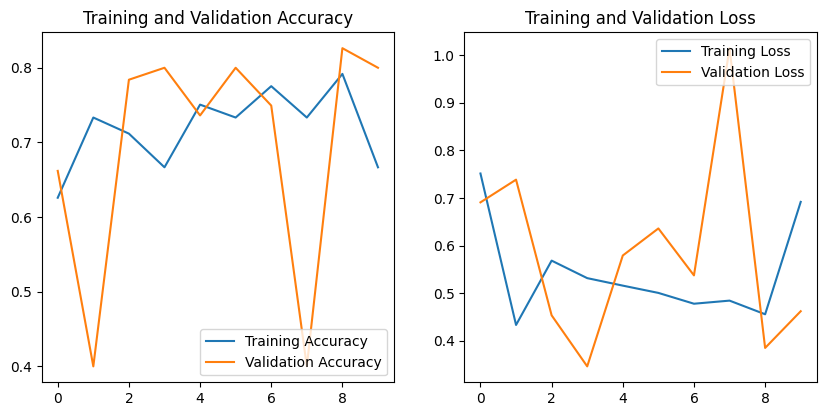

In [28]:
#visualization 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
model.evaluate(x=train_generator)

1334/1334 ━━━━━━━━━━━━━━━━━━━━ 168s 126ms/step - accuracy: 0.7852 - loss: 0.4471


[0.44984370470046997, 0.782800018787384]

In [30]:
test_df

filename
0          1.jpg
1         10.jpg
2        100.jpg
3       1000.jpg
4      10000.jpg
...          ...
12495   9995.jpg
12496   9996.jpg
12497   9997.jpg
12498   9998.jpg
12499   9999.jpg

[12500 rows x 1 columns]

In [33]:
steps = int(np.ceil(nb_samples / batch_size))
predict = model.predict(train_generator, steps=steps)

834/834 ━━━━━━━━━━━━━━━━━━━━ 101s 121ms/step


In [34]:
predict = pd.DataFrame(predict)
predict

0         1
0      0.807868  0.192132
1      0.142351  0.857649
2      0.786309  0.213691
3      0.936996  0.063004
4      0.936677  0.063324
...         ...       ...
12505  0.528614  0.471386
12506  0.804749  0.195251
12507  0.464656  0.535344
12508  0.466926  0.533074
12509  0.945143  0.054857

[12510 rows x 2 columns]

In [35]:
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 1
for i in range(8):
    drop_indices = np.random.choice(predict.index, remove_n, replace=False)
    predict = predict.drop(drop_indices)

predict

0         1
0      0.807868  0.192132
1      0.142351  0.857649
2      0.786309  0.213691
3      0.936996  0.063004
4      0.936677  0.063324
...         ...       ...
12505  0.528614  0.471386
12506  0.804749  0.195251
12507  0.464656  0.535344
12508  0.466926  0.533074
12509  0.945143  0.054857

[12502 rows x 2 columns]

In [36]:
predict.drop([1],axis=1,inplace=True)
predict

0
0      0.807868
1      0.142351
2      0.786309
3      0.936996
4      0.936677
...         ...
12505  0.528614
12506  0.804749
12507  0.464656
12508  0.466926
12509  0.945143

[12502 rows x 1 columns]

In [38]:
# Trim predictions to match the length of test_df
predict = predict[:len(test_df)]

# Converting predictions to categorical labels
test_df['category'] = np.argmax(predict, axis=-1)

# Replace numeric labels with class names
label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

# Replace class names with binary labels if needed
test_df['category'] = test_df['category'].replace({'dog': 1, 'cat': 0})


C:\Users\Madhumitha\AppData\Local\Temp\ipykernel_28156\885815266.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({'dog': 1, 'cat': 0})


In [39]:
test_df

filename  category
0          1.jpg         0
1         10.jpg         0
2        100.jpg         0
3       1000.jpg         0
4      10000.jpg         0
...          ...       ...
12495   9995.jpg         0
12496   9996.jpg         0
12497   9997.jpg         0
12498   9998.jpg         0
12499   9999.jpg         0

[12500 rows x 2 columns]

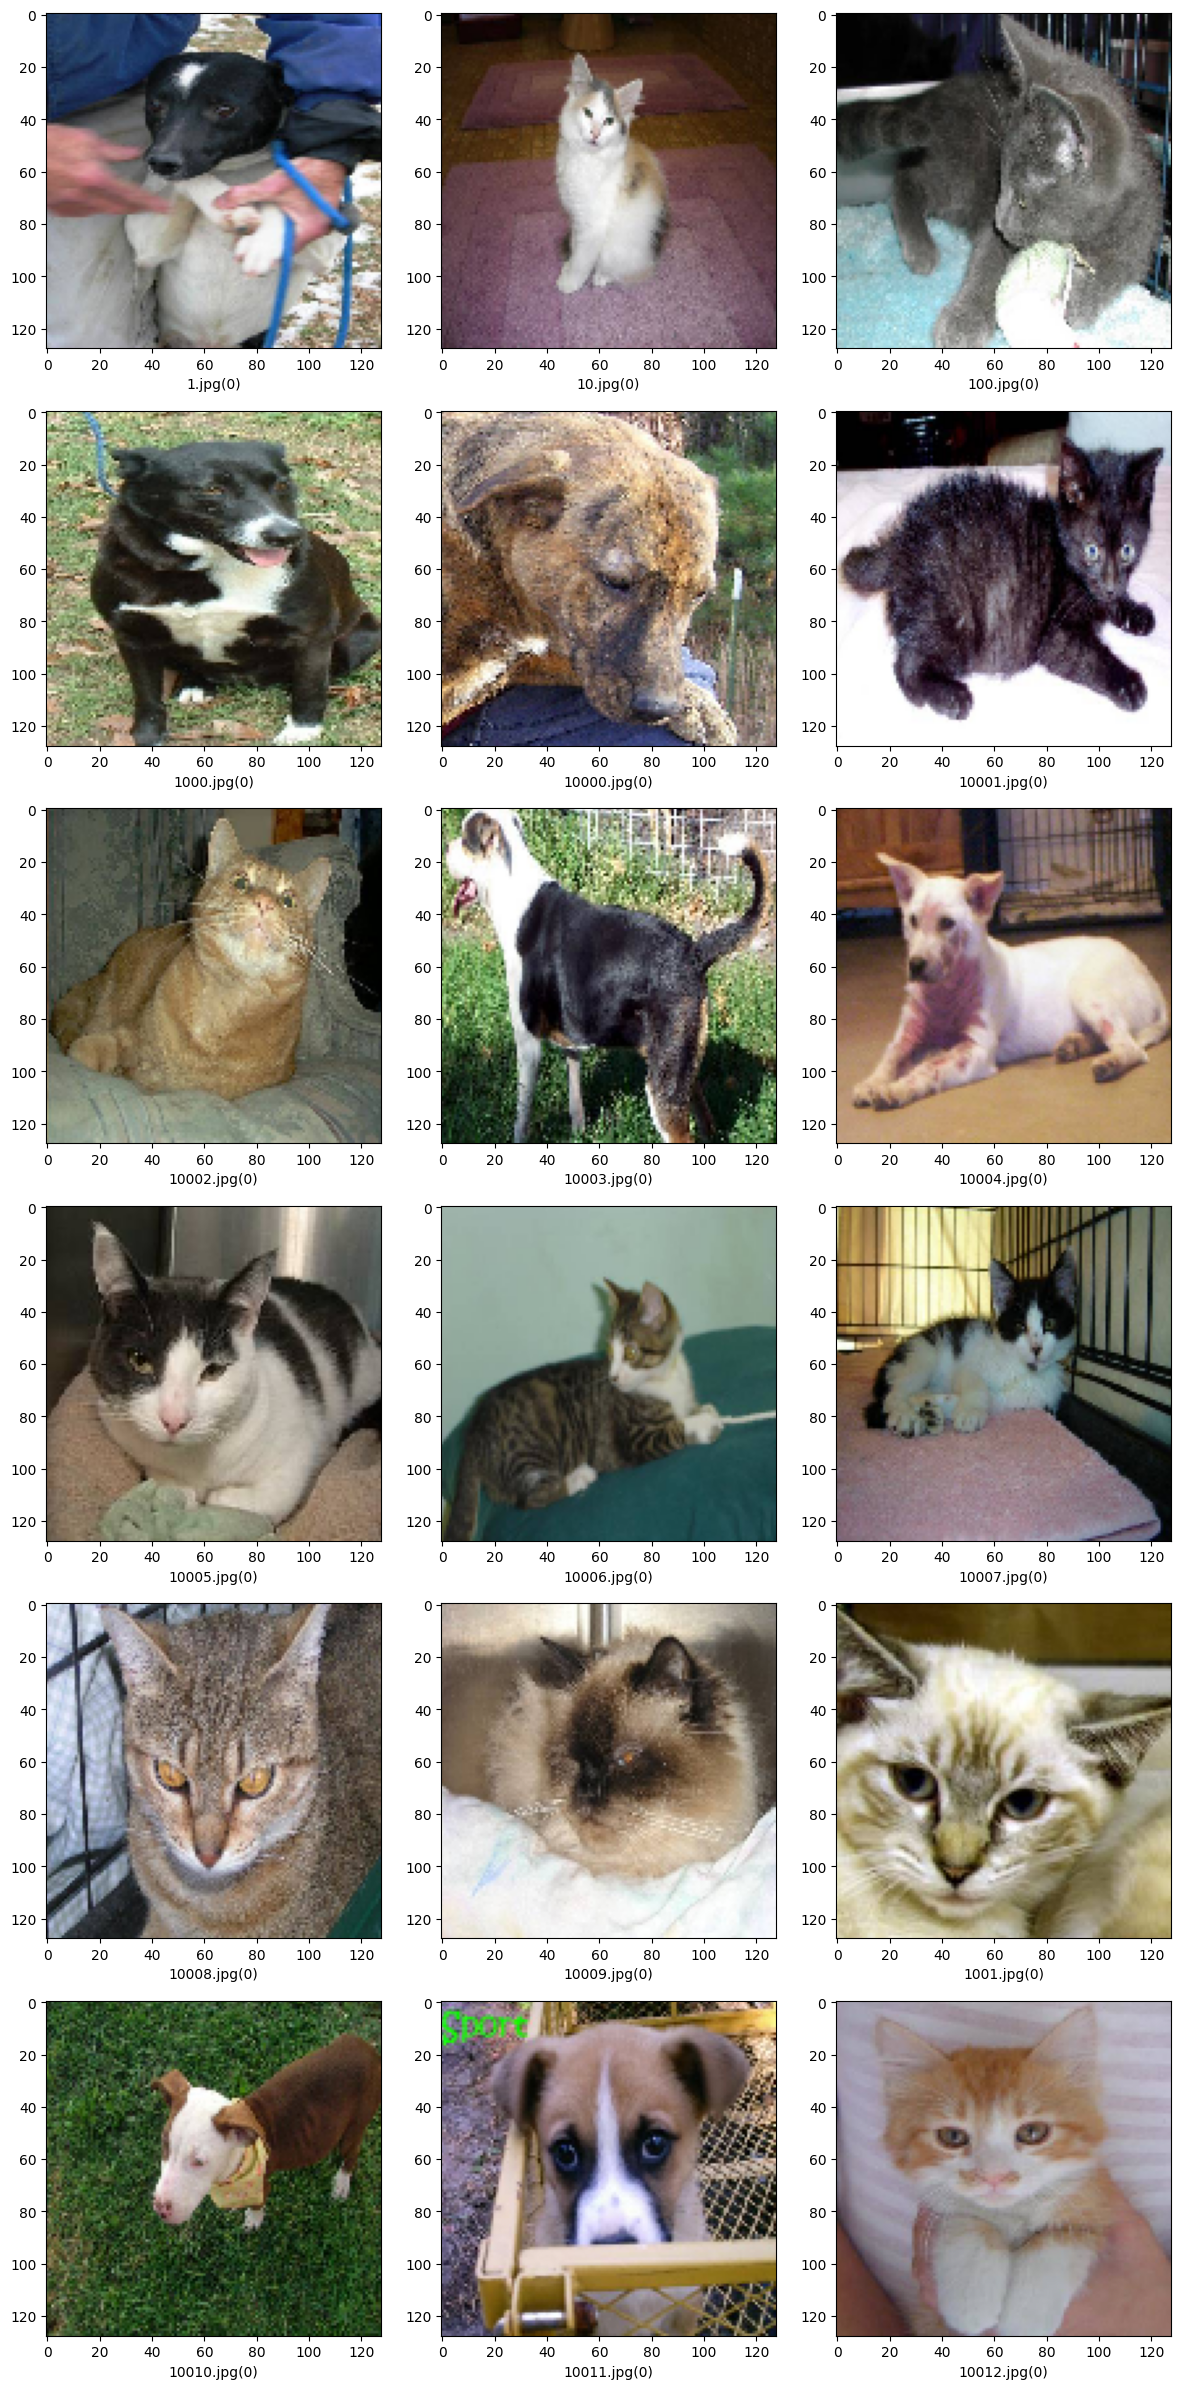

In [40]:
#predicted result
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

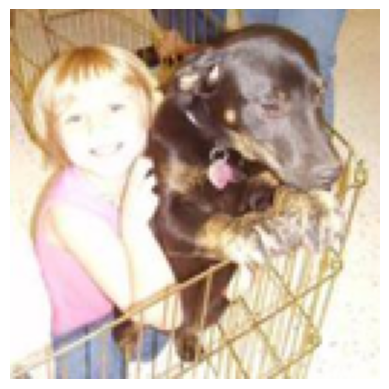

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1 dog


In [43]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Open and preprocess the image
im = Image.open("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/59.jpg")
im = im.resize(Image_Size)  # Resize to match the input size of your model

# Display the image
plt.imshow(im)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Continue with prediction
im_array = np.expand_dims(im, axis=0)  # Add batch dimension
im_array = np.array(im_array)
im_array = im_array / 255.0  # Normalize the image

# Predict the class
pred = model.predict(im_array)  # Get the prediction probabilities
pred_class = np.argmax(pred, axis=-1)[0]  # Get the index of the class with the highest probability

# Output the result
results = {0: 'cat', 1: 'dog'}
print(pred_class, results[pred_class])


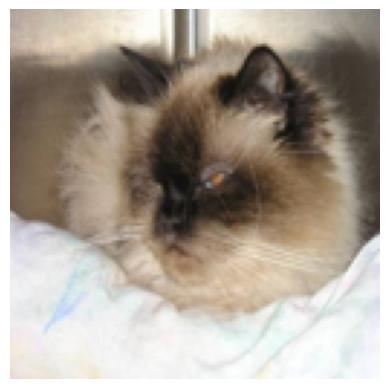

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0 cat


In [44]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Open and preprocess the image
im = Image.open("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/10009.jpg")
im = im.resize(Image_Size)  # Resize to match the input size of your model

# Display the image
plt.imshow(im)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Continue with prediction
im_array = np.expand_dims(im, axis=0)  # Add batch dimension
im_array = np.array(im_array)
im_array = im_array / 255.0  # Normalize the image

# Predict the class
pred = model.predict(im_array)  # Get the prediction probabilities
pred_class = np.argmax(pred, axis=-1)[0]  # Get the index of the class with the highest probability

# Output the result
results = {0: 'cat', 1: 'dog'}
print(pred_class, results[pred_class])


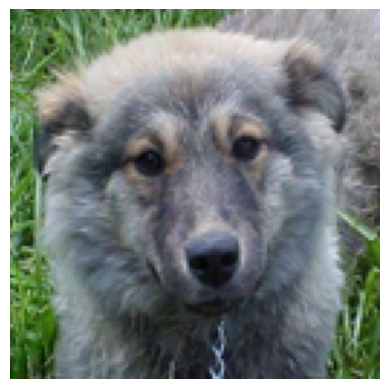

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1 dog


In [45]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Open and preprocess the image
im = Image.open("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/247.jpg")
im = im.resize(Image_Size)  # Resize to match the input size of your model

# Display the image
plt.imshow(im)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Continue with prediction
im_array = np.expand_dims(im, axis=0)  # Add batch dimension
im_array = np.array(im_array)
im_array = im_array / 255.0  # Normalize the image

# Predict the class
pred = model.predict(im_array)  # Get the prediction probabilities
pred_class = np.argmax(pred, axis=-1)[0]  # Get the index of the class with the highest probability

# Output the result
results = {0: 'cat', 1: 'dog'}
print(pred_class, results[pred_class])


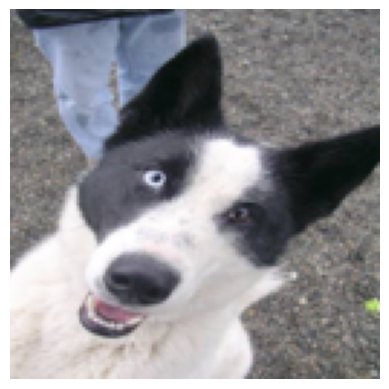

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1 dog


In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Open and preprocess the image
im = Image.open("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/167.jpg")
im = im.resize(Image_Size)  # Resize to match the input size of your model

# Display the image
plt.imshow(im)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Continue with prediction
im_array = np.expand_dims(im, axis=0)  # Add batch dimension
im_array = np.array(im_array)
im_array = im_array / 255.0  # Normalize the image

# Predict the class
pred = model.predict(im_array)  # Get the prediction probabilities
pred_class = np.argmax(pred, axis=-1)[0]  # Get the index of the class with the highest probability

# Output the result
results = {0: 'cat', 1: 'dog'}
print(pred_class, results[pred_class])


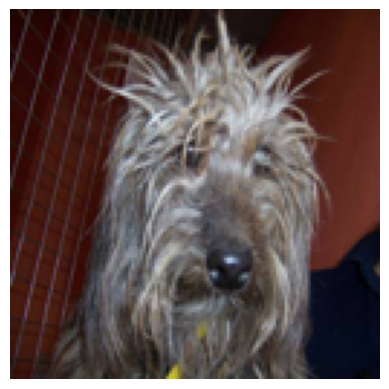

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1 dog


In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Open and preprocess the image
im = Image.open("D:/madhu/AI_intern/Basic/dog_cat/dog_cat_classification/dogs-vs-cats/test1/196.jpg")
im = im.resize(Image_Size)  # Resize to match the input size of your model

# Display the image
plt.imshow(im)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Continue with prediction
im_array = np.expand_dims(im, axis=0)  # Add batch dimension
im_array = np.array(im_array)
im_array = im_array / 255.0  # Normalize the image

# Predict the class
pred = model.predict(im_array)  # Get the prediction probabilities
pred_class = np.argmax(pred, axis=-1)[0]  # Get the index of the class with the highest probability

# Output the result
results = {0: 'cat', 1: 'dog'}
print(pred_class, results[pred_class])
